# COMPARITIVE STUDY FOR DRIVER'S DROWSINESS DETECTION 

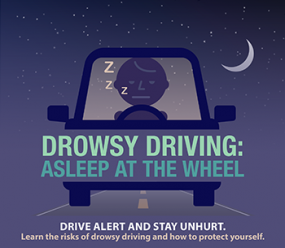

### Aim:
    Our project aims at providing a solution for sleepness dtection while driver is on the wheel. As we know, sleeping while driving is very dangerous not only for the driver, but also for others. Neumerous accident cases have been reported due to the driver falling asleep while driving for maybe even a second. 

### Project flow:
    We have implemented our project using:
        1. Basic CNN model using np array's from scratch. 
        2. BasiC CNN model using keras. 
        3. VGG 16 model using keras. 
    Our project contains 3 ipynb files: 
        1. Basic CNN file using np array's from scratch.
        2. BasiC CNN model using keras
            2a. CNN code for training data
            2b. CNN code for the testing data 
        3.  VGG 16 model 
            3a. VGG16 code code for training data
            3b. VGG16 code code for testing data

## This file contains the code that will help us to TRAIN and TEST our basic CNN model  using keras 

### Importing Packages

In [2]:

import numpy as np #used to perform opertaions on arrays 
import pandas as pd #used for data analysis and associated manipulation of tabular data in Dataframes
import os #helps in providing functions to import with the oeprating system
import cv2 
import matplotlib.pyplot as plot #helps in creating vizualizations in python
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from pygame import mixer
import time

pygame 2.1.2 (SDL 2.0.18, Python 3.8.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
#  Mounting to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
plot.style.use('dark_background') #setting a plot color for our graph that we will be plotting later

In [5]:
# The use of this function is to read all the images and plot them.
def image_plot(path, top=10):
    item_directories = os.listdir(path) #fetched the path
    item_files = [os.path.join(path, record) for record in item_directories][:5] #reading each item from the folder
  
    plot.figure(figsize=(20, 20)) #defining the figure size 
  
    for var_1, image_path in enumerate(item_files):
        plot.subplot(10, 10, var_1+1)
        image = plot.imread(image_path)
        plot.tight_layout()         
        plot.imshow(image, cmap='gray')  #running htrough a loop and plotting each image 


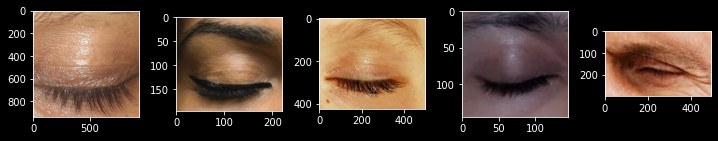

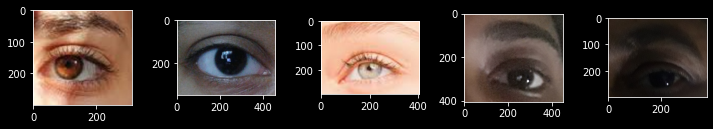

In [6]:
# calling the above function and vizualizing sample images
data_loc = '/content/gdrive/MyDrive/dataset/dataset_eye/train'
folder_loc = ['/Closed', '/Open']
for var_2 in folder_loc:
    image_plot(data_loc+var_2)

### Preprocessing the data 

In [7]:
batch_size = 128 #setting a batch size so that images will be divided accorinf to the batch size
trn_data_split = ImageDataGenerator(horizontal_flip = True, 
                                  rescale = 1./255, 
                                  zoom_range = 0.2, 
                                  validation_split = 0.1) #Taking the train dataset, preprocessing it by, rescaling, zooming and flipping the data. 
tst_data_split = ImageDataGenerator(rescale = 1./255) #Taking the test dataset and preprocessing it.

In [8]:
train_data_loc = '/content/gdrive/MyDrive/dataset/dataset_eye/train' #location where we have to get the train data from
test_data_loc = '/content/gdrive/MyDrive/dataset/dataset_eye/test' #location where we have to get the test data from

print("The total number of images along with the number of classes in the train dataset are:")
train_set = trn_data_split.flow_from_directory(train_data_loc, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical') #we convert it to grayscale since basic cnn accepts only grayscale image. 
print("The total number of images along with the number of classes in the train dataset are:")
test_set = tst_data_split.flow_from_directory(test_data_loc, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical') #we convert it to grayscale since basic cnn accepts only grayscale image.

The total number of images along with the number of classes in the train dataset are:
Found 1234 images belonging to 2 classes.
The total number of images along with the number of classes in the train dataset are:
Found 218 images belonging to 2 classes.


### Model implementation 

In [9]:

classes = 2 #Open eye and close eye are our two classes

#defining our model that has 1 input layer, 2 hidden layers, one fully connected layers and one output layer.
basic_cnn_model = Sequential()
basic_cnn_model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (256,256,1), activation = 'relu'))
basic_cnn_model.add(MaxPooling2D(pool_size = (2,2)))

basic_cnn_model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
basic_cnn_model.add(MaxPooling2D(pool_size = (2,2)))

basic_cnn_model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(2,2))) 

basic_cnn_model.add(Flatten())

basic_cnn_model.add(Dense(64, activation = 'relu'))

basic_cnn_model.add(Dense(classes, activation = 'softmax'))

print(basic_cnn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

In [10]:
basic_cnn_model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy']) #compiling the model we built by using adam optimizer and calculating the accuracy of the model
model_path="/content/gdrive/MyDrive/drowsiness_detection.h5" #path to save the model we have created so that we can use it while testing the model

item_check = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max') #Saves the best model from all the epochs we have run

callbacks_list = [item_check]


### Running epochs 

In [11]:
epoch_number = 10 # setting the number of epochs 
trn_stps=train_set.n//train_set.batch_size
tst_stps =test_set.n//test_set.batch_size

In [12]:
print("Steps taken for the train data\n",trn_stps)
print("Steps taken for the test data\n",tst_stps)

Steps taken for the train data
 9
Steps taken for the test data
 1


In [13]:
history = basic_cnn_model.fit_generator(train_set, epochs=epoch_number, steps_per_epoch=trn_stps,validation_data=test_set,
                    validation_steps=tst_stps, callbacks = callbacks_list) #fitting the model and running the dataset accoridng to our epoch value, and calculating the loss and accuracy.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 1.2731 - accuracy: 0.5380 
Epoch 1: val_accuracy improved from -inf to 0.52344, saving model to /content/gdrive/MyDrive/drowsiness_detection.h5
9/9 [==============================] - 193s 20s/step - loss: 1.2731 - accuracy: 0.5380 - val_loss: 0.6901 - val_accuracy: 0.5234
Epoch 2/10
9/9 [==============================] - ETA: 0s - loss: 0.6633 - accuracy: 0.6112
Epoch 2: val_accuracy improved from 0.52344 to 0.86719, saving model to /content/gdrive/MyDrive/drowsiness_detection.h5
9/9 [==============================] - 16s 2s/step - loss: 0.6633 - accuracy: 0.6112 - val_loss: 0.5845 - val_accuracy: 0.8672
Epoch 3/10
9/9 [==============================] - ETA: 0s - loss: 0.5400 - accuracy: 0.7749
Epoch 3: val_accuracy did not improve from 0.86719
9/9 [==============================] - 15s 2s/step - loss: 0.5400 - accuracy: 0.7749 - val_loss: 0.3696 - val_accuracy: 0.8672
Epoch 4/10
9/9 [==============================] - ET

### Vizualizing the loss and accuracy for our train and test set

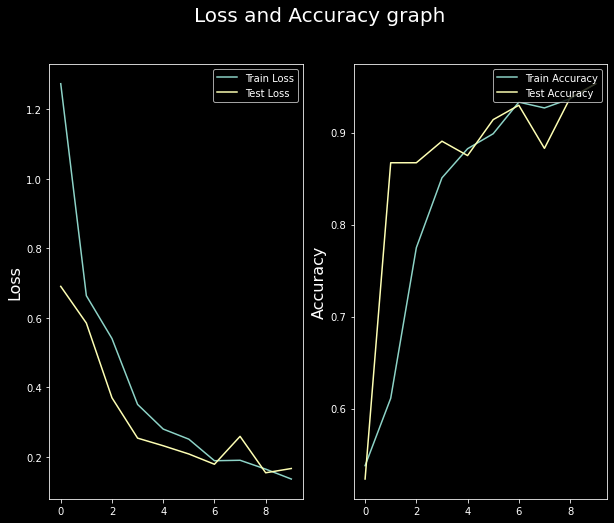

In [14]:
plot.figure(figsize=(10,8))
plot.subplot(1, 2, 1)
plot.suptitle('Loss and Accuracy graph', fontsize=20)
plot.ylabel('Loss', fontsize=16)
plot.plot(history.history['loss'], label='Train Loss')
plot.plot(history.history['val_loss'], label='Test Loss')
plot.legend(loc='upper right')

plot.subplot(1, 2, 2)
plot.ylabel('Accuracy', fontsize=16)
plot.plot(history.history['accuracy'], label='Train Accuracy')
plot.plot(history.history['val_accuracy'], label='Test Accuracy')
plot.legend(loc='upper right')
plot.show()

### Testing the Model

In [4]:
mixer.init()
music_to_be_played = mixer.Sound('C:/Users/lakshman/Desktop/Group_9/Group_9/alarm.wav') #contains the file the has helps in altering the driver by playing the sound
frontal_face = cv2.CascadeClassifier('C:/Users/lakshman/Desktop/Group_9/Group_9/haarcascade_frontalface_alt.xml') #we test using haarcascade classifier that helps us to identify the frontal face of the user.
left_eye = cv2.CascadeClassifier('C:/Users/lakshman/Desktop/Group_9/Group_9/haarcascade_lefteye_2splits.xml') #identify the left eye using haarcascade classifier
right_eye = cv2.CascadeClassifier('C:/Users/lakshman/Desktop/Group_9/Group_9/haarcascade_righteye_2splits.xml') #identify the right eye using haarcascade classifier
basic_cnn_model = load_model('C:/Users/lakshman/Desktop/Group_9/Group_9/drowsiness_detection.h5') #loading the model we created previously
path = os.getcwd()
video_cap = cv2.VideoCapture(0) #capturing the video
font_name = cv2.FONT_HERSHEY_COMPLEX_SMALL #setting the font type
count=0 #setting tge count var
score=0 #setting the score initially to be zero 
var=2 
right_pred=[99] #initilzing the right and left pred 
left_pred=[99]

while(True):
    rectangle, draw = video_cap.read() #capturing the video in a frame
    hei,wid = draw.shape[:2] #defining the height and width of frame

    gray = cv2.cvtColor(draw, cv2.COLOR_BGR2GRAY) #converting to grayscale
    
    faces = frontal_face.detectMultiScale(draw,minNeighbors=5,scaleFactor=1.1,minSize=(25,25)) #creating the object to identify the frontalface 
    left_eyes = left_eye.detectMultiScale(draw) # identifying the left eye
    right_eyes =  right_eye.detectMultiScale(draw) #identifying the right eye 

    cv2.rectangle(draw, (0,hei-50) , (200,hei) , (0,0,0) , thickness=cv2.FILLED ) #drawing the rectangle 
    #identify the face dimensions from the rectangle, after which it identifies the right eye, does prediction whether right eye is closed or open. Similarly it does for the left eye as well. 
    for (l,b,w,h) in faces:
        cv2.rectangle(draw, (l,b) , (l+w,b+h) , (100,100,100) , 1 )

    for (l,b,w,h) in right_eyes:
        right_eye_capture=draw[b:b+h,l:l+w]
        count=count+1
        right_eye_capture = cv2.cvtColor(right_eye_capture,cv2.COLOR_BGR2GRAY)
        right_eye_capture = cv2.resize(right_eye_capture,(256,256))
        right_eye_capture= right_eye_capture/255
        right_eye_capture=  right_eye_capture.reshape(256,256,-1)
        right_eye_capture = np.expand_dims(right_eye_capture,axis=0)
        right_pred_1 = basic_cnn_model.predict(right_eye_capture)
        print("*******************************************************************************")
        print(right_pred_1)
        class_labels=['Closed','Open']
        right_pred = class_labels[right_pred_1.argmax()]
        print("*******************************************************************************")
        print(right_pred)
        if(right_pred=='Open'):
            class_labels='Open' 
        if(right_pred=='Closed'):
            class_labels='Closed'
        break

    for (l,b,w,h) in left_eyes:
        left_eye_capture=draw[b:b+h,l:l+w]
        count=count+1
        left_eye_capture = cv2.cvtColor(left_eye_capture,cv2.COLOR_BGR2GRAY)  
        left_eye_capture = cv2.resize(left_eye_capture,(256,256))
        left_eye_capture= left_eye_capture/255
        left_eye_capture=left_eye_capture.reshape(256,256,-1)
        left_eye_capture = np.expand_dims(left_eye_capture,axis=0)
        left_pred_1 = basic_cnn_model.predict(left_eye_capture)

        print("----------------------------------------------------------------------------------")
        print(left_pred_1)
        class_labels=['Closed','Open']
        left_pred = class_labels[left_pred_1.argmax()]
        print("----------------------------------------------------------------------------------")
        print(left_pred)
        if(left_pred=='Open'):
            class_labels='Open' 
        if(left_pred=='Closed'):
            class_labels='Closed' 
        break
        #if both eyes are closed, we increment the counter, and when closed score is 16, alarm is raised, where the "alarm.wav" sound is played. 
    if(right_pred=='Closed' and left_pred =='Closed'):
        score=score+1
        cv2.putText(draw,"Closed",(10,hei-20), font_name, 1,(255,255,255),1,cv2.LINE_AA)
    else:
        score=score-1
        cv2.putText(draw,"Open",(10,hei-20), font_name, 1,(255,255,255),1,cv2.LINE_AA)
    
    if(score<0):
        score=0   
    cv2.putText(draw,'Score:'+str(score),(100,hei-20), font_name, 1,(255,255,255),1,cv2.LINE_AA)
    if(score>15):
        cv2.imwrite(os.path.join(path,'image.jpg'),draw)
        try:
            music_to_be_played.play()
        except: 
            pass
        if(var<16):
            var= var+2
        else:
            var=var-2
            if(var<2):
                var=2
        cv2.rectangle(draw,(0,0),(wid,hei),(0,0,255),var) 
    cv2.imshow('Realtime video detection for drowsiness detection using basic CNN',draw)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_cap.release()
cv2.destroyAllWindows()


*******************************************************************************
[[0.2613368 0.7386632]]
*******************************************************************************
Open
----------------------------------------------------------------------------------
[[0.4030815 0.5969185]]
----------------------------------------------------------------------------------
Open
*******************************************************************************
[[0.47102362 0.5289764 ]]
*******************************************************************************
Open
----------------------------------------------------------------------------------
[[0.3337345 0.6662655]]
----------------------------------------------------------------------------------
Open
*******************************************************************************
[[0.33550915 0.6644908 ]]
*******************************************************************************
Open
---------------------------------------

----------------------------------------------------------------------------------
[[0.8205722  0.17942779]]
----------------------------------------------------------------------------------
Closed
*******************************************************************************
[[0.76378584 0.23621415]]
*******************************************************************************
Closed
----------------------------------------------------------------------------------
[[0.82023096 0.17976898]]
----------------------------------------------------------------------------------
Closed
*******************************************************************************
[[0.71442926 0.28557083]]
*******************************************************************************
Closed
----------------------------------------------------------------------------------
[[0.7996759  0.20032415]]
----------------------------------------------------------------------------------
Closed
*****************